In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt 
import numpy as np
from keras.utils.np_utils import to_categorical
import random,shutil
from keras.models import Sequential
from keras.layers import Dropout,Conv2D,Flatten,Dense, MaxPooling2D, BatchNormalization
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
data_gen = image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
)

train_generator = data_gen.flow_from_directory(
    '/content/drive/MyDrive/train',
    target_size=(74, 74),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='training',
    color_mode='grayscale',
    seed=17
)

val_generator = data_gen.flow_from_directory(
    '/content/drive/MyDrive/train',
    target_size=(74, 74),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='validation',
    color_mode='grayscale',
    seed=17
)

Found 4362 images belonging to 2 classes.
Found 1090 images belonging to 2 classes.


In [ ]:
BS= 32
TS=(74,74)
SPE= len(train_generator.classes)//BS
VS = len(val_generator.classes)//BS
print(SPE,VS)

136 34


In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(74,74,1)),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
epochs = 15

history = model.fit_generator(train_generator, validation_data=val_generator,epochs=15,steps_per_epoch=SPE ,validation_steps=VS)

model.save('models/Drowsiness_model.h5', overwrite=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/15
136/136 [==============================] - 1774s 13s/step - loss: 0.3038 - accuracy: 0.8848 - val_loss: 0.7554 - val_accuracy: 0.8346
Epoch 2/15
136/136 [==============================] - 190s 1s/step - loss: 0.0952 - accuracy: 0.9718 - val_loss: 0.5063 - val_accuracy: 0.8566
Epoch 3/15
136/136 [==============================] - 190s 1s/step - loss: 0.0633 - accuracy: 0.9811 - val_loss: 0.5215 - val_accuracy: 0.8695
Epoch 4/15
136/136 [==============================] - 192s 1s/step - loss: 0.0615 - accuracy: 0.9813 - val_loss: 0.5361 - val_accuracy: 0.8649
Epoch 5/15
136/136 [==============================] - 194s 1s/step - loss: 0.0404 - accuracy: 0.9876 - val_loss: 0.5785 - val_accuracy: 0.8824
Epoch 6/15
136/136 [==============================] - 194s 1s/step - loss: 0.0236 - accuracy: 0.9935 - val_loss: 0.6517 - val_accuracy: 0.8971
Epoch 7/15
136/136 [==============================] - 192s 1s/step - loss: 0.0270 - accuracy: 0.9921 - val_loss: 0.4206 - val_accuracy: 0.91

Text(0.5, 1.0, 'Training and Validation Accuracy')

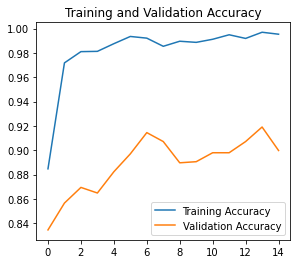

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')




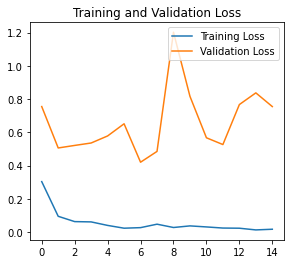

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()